In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import joblib

import plotly.graph_objects as go

from cfl.cluster_methods.kmeans import KMeans
from cfl.experiment import Experiment
from visual_bars import generate_visual_bars_data as vbd
from cfl.util.data_processing import one_hot_encode
from cfl.dataset import Dataset
from cfl.visualization_methods import clustering_to_sankey as sk


In [17]:
# # create a visual bars data set 

# n_samples = 10000
# noise_lvl = 0.0
# im_shape = (10, 10)
# print('Generating a visual bars dataset with {} samples at noise level {}'.format(n_samples, noise_lvl))

# vb_data = vbd.VisualBarsData(n_samples=n_samples, im_shape = im_shape, noise_lvl=noise_lvl)

# x = vb_data.getImages()
# y = vb_data.getTarget()
 
# # format data 
# x = np.reshape(x, (n_samples, np.prod(im_shape)))
# y = one_hot_encode(y, unique_labels=[0,1])

Generating a visual bars dataset with 10000 samples at noise level 0.0


In [18]:
print(x.shape)
print(y.shape)

(10000, 100)
(10000, 2)


save_path 'C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test' doesn't exist, creating now.
All results from this run will be saved to C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test\experiment0000
opt_config not specified in input, defaulting to {}
verbose not specified in input, defaulting to 1
dense_units not specified in input, defaulting to [50, 2]
activations not specified in input, defaulting to ['relu', 'linear']
dropouts not specified in input, defaulting to [0, 0]
weights_path not specified in input, defaulting to None
loss not specified in input, defaulting to mean_squared_error
show_plot not specified in input, defaulting to True
name not specified in input, defaulting to CondExpVB
standardize not specified in input, defaulting to False
best not specified in input, defaulting to True
Training CFL pipeline.
Train on 7500 samples, validate on 2500 samples
Epoch 1/30
7500/7500 [==============================] - 4s 567us/sample - loss: 2.1174 - val_loss: 0.2072
Epoch

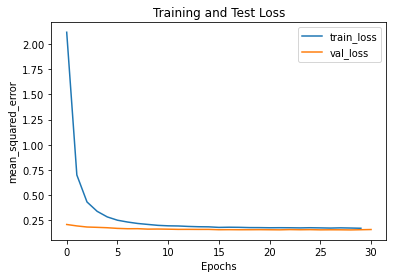

Saving parameters to  C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test\experiment0000\trained_blocks\CondExpVB


In [19]:
# # create a CDE-only experiment with visual bars data and train 
# data_info = { 'X_dims' : x.shape, 
#               'Y_dims' : y.shape, 
#               'Y_type' : 'categorical' } 

# # CDE parameters
# CDE_params = {  'batch_size': 32,
#                 'optimizer': 'adam', 
#                 'n_epochs': 30, 
#                  }
                            
# block_names = ['CondExpVB']
# block_params = [CDE_params]

# # save_path = '/Users/imanwahle/Desktop/cfl/examples/exp_results'
# save_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test'
# my_exp = Experiment(X_train=x, Y_train=y, data_info=data_info, block_names=block_names, block_params=block_params, blocks=None, results_path=save_path)


In [20]:
# # load the CDE results  
# import joblib
# import os
# cde_results_dict = joblib.load(os.path.join('/', save_path, 'experiment0007/dataset_train/CondExpVB_results.pickle'))

# pyx = cde_results_dict['pyx']
# # load CondExpVB_results 
# # format is a results dict 
# # want the [pyx] from the results 

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test\\experiment0007/dataset_train/CondExpVB_results.pickle'

In [105]:
# # pyx is an array n_samples long
# # where the first entry in each row is P(y=0 | X=x) and the 
# # second entry is P(y=1 | X=x) 
# # (the first and second entry of each row roughly add up to 1)
# pyx.shape
# pyx[:10]

array([[0.4968367 , 0.5029416 ],
       [0.5428738 , 0.45675695],
       [0.04811791, 0.95084274],
       [0.44256657, 0.55704117],
       [0.0821687 , 0.91722846],
       [0.7752958 , 0.2248357 ],
       [0.81293213, 0.18709275],
       [0.36047077, 0.63877225],
       [0.13486803, 0.86466295],
       [0.23128805, 0.7679382 ]], dtype=float32)

In [106]:
# # create a number of Kmeans objects with different Ks 
# k_range = range(2, 8)

# kmeans_l = []
# for n_clusters in k_range:
#     params = {'n_Xclusters': n_clusters, 'n_Yclusters': 2} 
#     kmeans_obj = KMeans('Kmeans', data_info, params, random_state=143)
#     kmeans_l.append(kmeans_obj)

# data = Dataset(x, y)

# # trained all the data on the kmeanss 
# x_lbls_L = []
# for kmeans_obj in kmeans_l: 
#   cluster_results = kmeans_obj.train(data, cde_results_dict)
#   x_lbls_L.append(cluster_results['x_lbls'])

In [107]:
# data = Dataset(x, y)

# # trained all the data on the kmeanss 
# x_lbls_L = []
# for kmeans_obj in kmeans_l: 
#   cluster_results = kmeans_obj.train(data, cde_results_dict)
#   x_lbls_L.append(cluster_results['x_lbls'])

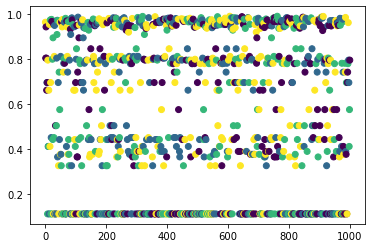

Average prediction for x-class 0: 0.58
Average prediction for x-class 1: 0.56
Average prediction for x-class 2: 0.57
Average prediction for x-class 3: 0.57


In [22]:

# truth = vb_data.getGroundTruth()
# plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)
# plt.scatter(range(1000), pyx[plot_idx,1], c=truth[plot_idx])
# plt.show()

# for i in range(4):
#     print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[truth==i,1])))


# # I don't know what to make of this. Is learning 3 distinct types of thing, but what are these? 

In [21]:
# #### sankey diagram 

# link, label = sk.convert_lbls_to_sankey_nodes(x_lbls_L)
# # plot
# fig = go.Figure(data=
#           [go.Sankey(node = dict(pad = 15, thickness=20, label = label, color =  "blue"),
#                      link = link)])
    
# fig.update_layout(title_text="Visual Bars Clustering with n_clusters 2 to 7", font_size=10)
# fig.show()

In [118]:
# after looking through these images, I realized that the cde/clusterer was doing a really bad job of classifying the images. So I redid with another CDE that learned them better 



In [79]:
# create a visual bars data set 

n_samples = 10000
noise_lvl = 0.0
im_shape = (10, 10)
random_seed = 143
print('Generating a visual bars dataset with {} samples at noise level {}'.format(n_samples, noise_lvl))

vb_data = vbd.VisualBarsData(n_samples=n_samples, im_shape = im_shape, noise_lvl=noise_lvl, set_random_seed=random_seed)

ims = vb_data.getImages()
y = vb_data.getTarget()
 
# format data 
x = np.expand_dims(ims, -1)

y = one_hot_encode(y, unique_labels=[0,1])

Generating a visual bars dataset with 10000 samples at noise level 0.0


All results from this run will be saved to C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test2\experiment0001
lr specified but not used by CondExpKC clusterer
opt_config not specified in input, defaulting to {}
verbose not specified in input, defaulting to 1
dense_units not specified in input, defaulting to [50, 2]
activations not specified in input, defaulting to ['relu', 'linear']
dropouts not specified in input, defaulting to [0, 0]
weights_path not specified in input, defaulting to None
loss not specified in input, defaulting to mean_squared_error
show_plot not specified in input, defaulting to True
name not specified in input, defaulting to CondExpKC
standardize not specified in input, defaulting to False
best not specified in input, defaulting to True
Training CFL pipeline.
Train on 7500 samples, validate on 2500 samples
Epoch 1/3
7500/7500 [==============================] - 2s 283us/sample - loss: 0.1786 - val_loss: 0.1462
Epoch 2/3
7500/7500 [==============================]

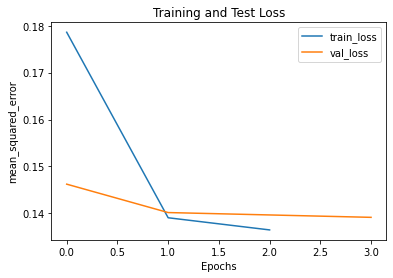

Saving parameters to  C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test2\experiment0001\trained_blocks\CondExpKC


In [68]:
lr = 1e-4 # this was 1e-3 in Chalupka's code
CDE_params = {  'batch_size': 32, # this was 10 in Chalupka's code
                    'lr': lr, 
                    'optimizer': 'adam', 
                    'n_epochs': 3, 
                    # 'standardize': True
                 }
data_info = {'X_dims': x.shape, 
             'Y_dims': y.shape, 
             'Y_type': 'categorical'}

block_names = ['CondExpKC']
block_params = [CDE_params]

# save_path = '/Users/imanwahle/Desktop/cfl/examples/exp_results'
save_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test2'
my_exp = Experiment(X_train=x, Y_train=y, data_info=data_info, block_names=block_names, block_params=block_params, blocks=None, results_path=save_path)



In [69]:
cde_results_dict = joblib.load(os.path.join('/', save_path, 'experiment0000/dataset_train/CondExpKC_results.pickle'))

pyx = cde_results_dict['pyx']


In [63]:
# pyx is n samples long, each subarray contains (P(Y=0), P(Y=1))
pyx[:10]

array([[0.89427006, 0.10572992],
       [0.02630139, 0.97369856],
       [0.04699164, 0.95300835],
       [0.89427006, 0.10572992],
       [0.6146925 , 0.38530746],
       [0.26548734, 0.7345127 ],
       [0.89427006, 0.10572992],
       [0.7051279 , 0.29487213],
       [0.89427006, 0.10572992],
       [0.89427006, 0.10572992]], dtype=float32)

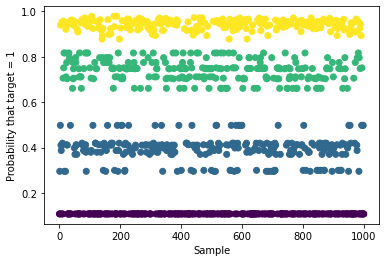

Average prediction for x-class 0: 0.11
Average prediction for x-class 1: 0.39
Average prediction for x-class 2: 0.74
Average prediction for x-class 3: 0.94


In [70]:

truth = vb_data.getGroundTruth()

#choose a thousand random samples from the pyx results 
plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)

# plot them 
plt.scatter(range(1000), pyx[plot_idx,1], c=truth[plot_idx])
plt.ylabel("Probability that target = 1")
plt.xlabel("Sample")
plt.show()

for i in range(4):
    print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[truth==i,1])))

# this cde is more or less learning the right kind of thing, but the 'bands' of conditional probabilities learned are kind of weird. 

In [57]:
# # this graph is the reverse of the above graph
# plt.scatter(range(1000), pyx[plot_idx,0], c=truth[plot_idx])
# plt.ylabel("Probability that target = 0")
# plt.xlabel("Sample")
# plt.show()

# for i in range(4):
#     print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[truth==i,0])))


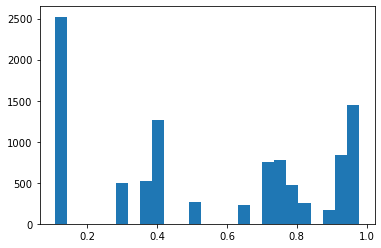

In [71]:
# show all the probabilities that y=1
plt.hist(pyx[:, 1], bins=25)
plt.show()

#same info as above, in a hist

In [72]:
# create a number of Kmeans objects with different Ks 
k_range = range(2, 8)

kmeans_l = []
for n_clusters in k_range:
    params = {'n_Xclusters': n_clusters, 'n_Yclusters': 2} 
    kmeans_obj = KMeans('Kmeans', data_info, params, random_state=143)
    kmeans_l.append(kmeans_obj)

data = Dataset(x, y)

# trained all the data on the kmeanss 
x_lbls_L = []
for kmeans_obj in kmeans_l: 
  cluster_results = kmeans_obj.train(data, cde_results_dict)
  x_lbls_L.append(cluster_results['x_lbls'])

In [73]:
link, label = convert_lbls_to_sankey_nodes(x_lbls_L)
# plot
fig = go.Figure(data=
          [go.Sankey(node = dict(pad = 15, thickness=20, label = label, color =  "blue"),
                     link = link)])
    
fig.update_layout(title_text="Visual Bars Clustering, no noise, with 2 to 7 Clusters", font_size=10)
fig.show()

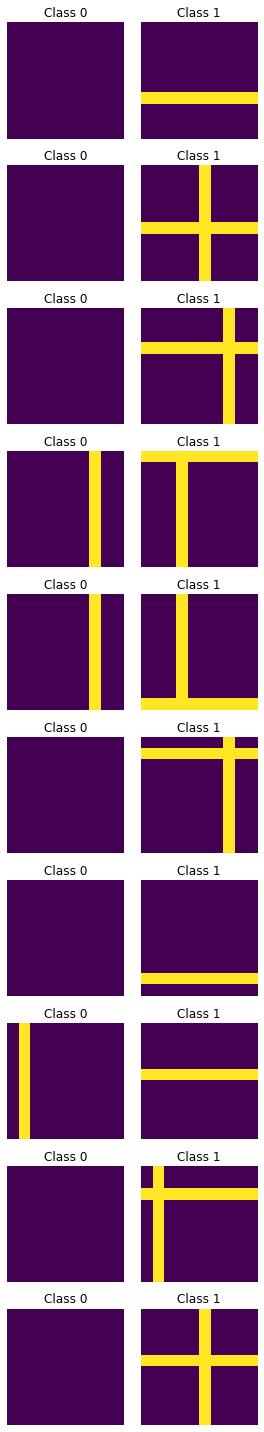

In [75]:
from cfl.visualization_methods import general_vis as vis

vis.view_class_examples(ims, im_shape, 10, x_lbls_L[0])

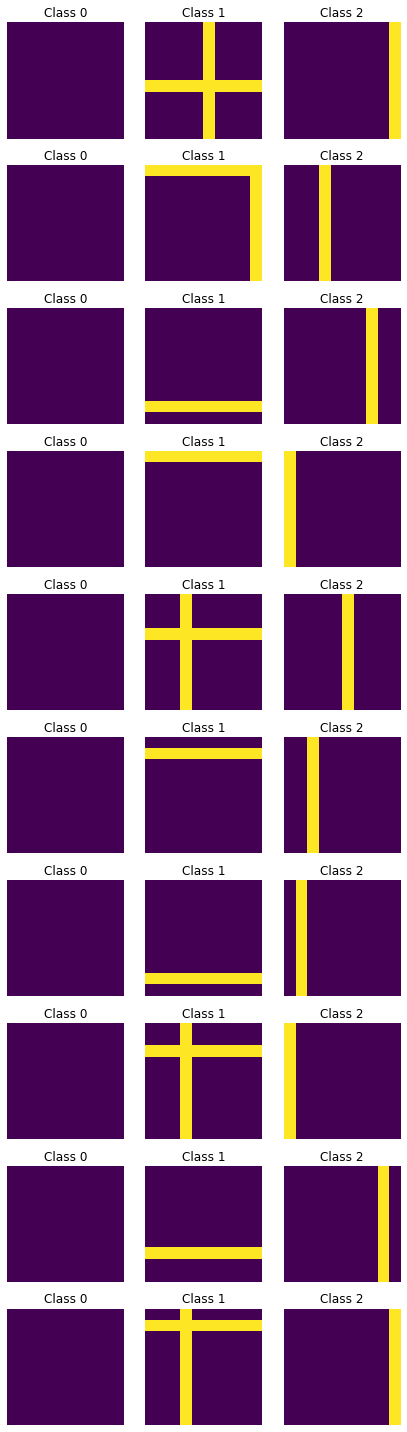

In [76]:
vis.view_class_examples(ims, im_shape, 10, x_lbls_L[1])

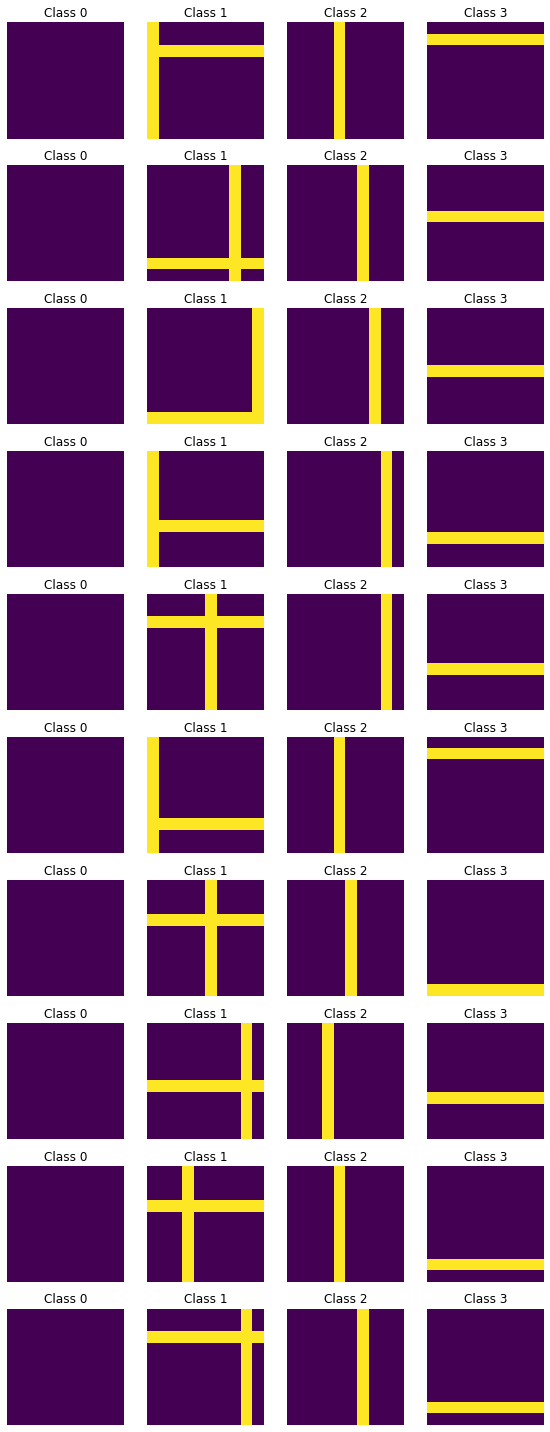

In [77]:
vis.view_class_examples(ims, im_shape, 10, x_lbls_L[2])

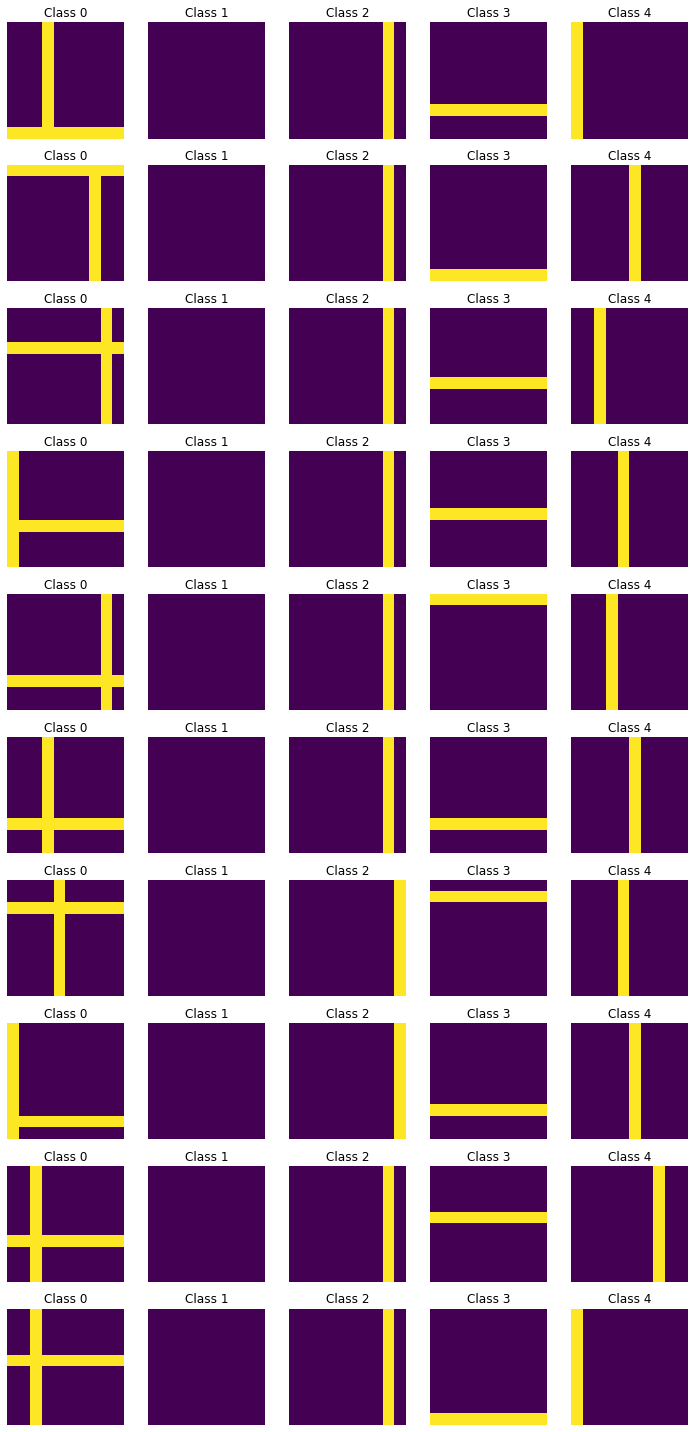

In [78]:
vis.view_class_examples(ims, im_shape, 10, x_lbls_L[3])